In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

np.set_printoptions(precision=3)
pd.set_option('display.precision', 3)

# Some evaluation metrics
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [ ]:
def plot (X, y):
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

## Regression

In [ ]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=200, n_features=2, 
                       noise = 12.8,
                       n_informative = 1, 
                       random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, shuffle = False)

In [ ]:
from sklearn.linear_model import LinearRegression

simple_LR = LinearRegression()

simple_LR.fit(X_train, y_train)

In [ ]:
y_test_pred = simple_LR.predict(X_test)

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(y_test_pred, y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [ ]:
from sklearn import metrics

metrics.mean_absolute_error(y_true=y_test, y_pred=y_test_pred)

In [ ]:
# Most modeles are tuned using this metrics.
# In general, rmse is more sensitive to outliers, but not always. Type of outliers matters!

metrics.mean_squared_error(y_true=y_test, y_pred=y_test_pred, squared=False)

In [ ]:
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

In [ ]:
# In fact, this is a weighted modification of MAE
# Problems with zero predictions or ground truth! Shifts may help.
# Modification exists - symmetric mean absolute percentage error

metrics.mean_absolute_percentage_error(y_true=y_test, y_pred=y_test_pred)

In [ ]:
# Assymetric loss functions: when errors in different directions cost differently.

## Binary classification

In [ ]:
from sklearn.datasets import make_classification  

X, y = make_classification(n_samples=50, n_classes = 2, weights = [.7, .3],
                           class_sep = 0.6,
                           n_features = 2, n_informative = 2, n_redundant = 0, 
                           random_state = 42)

In [ ]:
from collections import Counter

Counter(y)

In [ ]:
plot(X, y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, 
                                                    random_state=42,
                                                    stratify=y)


In [ ]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss = 'log_loss', random_state = 42, shuffle=True, learning_rate='optimal')
classifier.fit(X_train, y_train)


In [ ]:
print(y_test)

In [ ]:
y_test_pred = classifier.predict(X_test)
print(y_test_pred)

In [ ]:
y_majority_class = np.zeros(y_test.shape, dtype=int)
y_majority_class

In [ ]:
# Default threshold == 0.5

y_test_proba = classifier.predict_proba(X_test)
print(y_test_proba)

### Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

print (matrix)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.rcParams["figure.figsize"] = (3, 3)

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, labels = [1, 0])

plt.show()

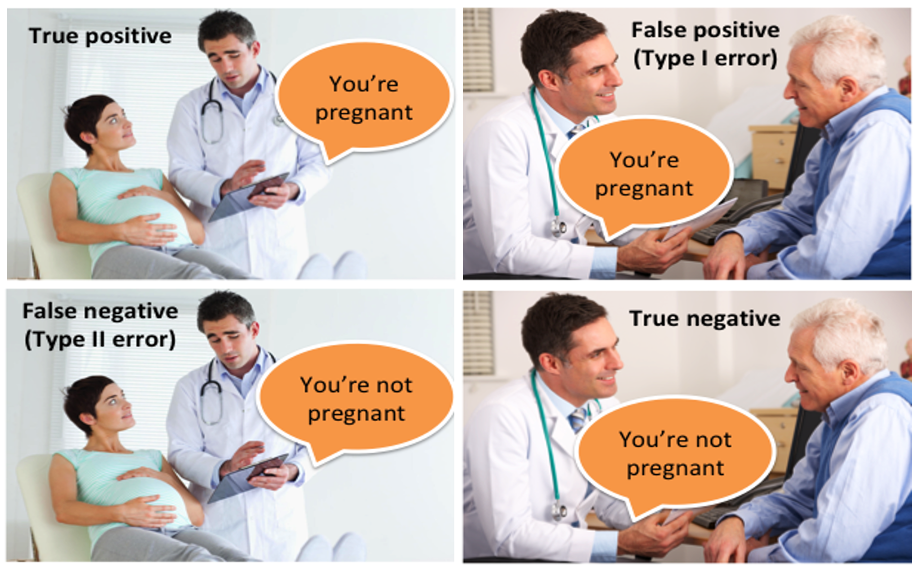

### Accuracy

accuracy = (TP + TN) / (TP + FP + TN + FN)

In [ ]:
from sklearn import metrics

metrics.accuracy_score(y_true=y_test, y_pred=y_test_pred)

In [ ]:
metrics.accuracy_score(y_true=y_test, y_pred=y_test_proba[:, 1] > 0.7)

In [ ]:
metrics.accuracy_score(y_true=y_test, y_pred=y_majority_class)

### Precision and recall

precision = TP / (TP + FP) <br>
recall = TP / (TP + FN)

In [ ]:
metrics.precision_score(y_true=y_test, y_pred=y_test_pred, pos_label = 1)

In [ ]:
metrics.precision_score(y_true=y_test, y_pred=y_test_pred, pos_label = 0)

In [ ]:
metrics.recall_score(y_true=y_test, y_pred=y_test_pred, pos_label = 1)

In [ ]:
metrics.recall_score(y_true=y_test, y_pred=y_test_pred, pos_label = 0)

### F-measure

F1 = 2 * precision * recall / (precision + recall)

In [ ]:
metrics.f1_score(y_true=y_test, y_pred=y_test_pred, pos_label = 1)

In [ ]:
metrics.f1_score(y_true=y_test, y_pred=y_test_pred, pos_label = 0)

### Classification report

In [ ]:
print(metrics.classification_report(y_true=y_test, y_pred=y_test_pred))

### Cohen’s kappa statistic
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html#sklearn.metrics.cohen_kappa_score <br>

k = (accuracy - accuracy_by_chance) / (1 - accuracy_by_chance) <br>

May be used to evaluate agreement between predictions and a ground truth.


In [ ]:
metrics.cohen_kappa_score(y_test, y_test_pred)

### Matthews correlation coefficient (MCC)
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html#sklearn.metrics.matthews_corrcoef <br>

MCC = (TP * TN - FP * FN) / sqrt ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

It takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. <br>
The MCC is in essence a correlation coefficient value between -1 and +1. <br>
A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction.

In [ ]:
metrics.matthews_corrcoef(y_true=y_test, y_pred=y_test_pred)

### Balanced accuracy
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn.metrics.balanced_accuracy_score <br>

BA = 0.5 * (TP / (TP + FN) + TN / (TN + FP))

The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.

In [ ]:
metrics.balanced_accuracy_score(y_true=y_test, y_pred=y_test_pred)

### ROC-AUC

In [ ]:
from sklearn.metrics import RocCurveDisplay

plt.rcParams["figure.figsize"] = (6, 4)

RocCurveDisplay.from_estimator(classifier, X_test, y_test)

plt.show()

In [ ]:
metrics.roc_auc_score(y_true=y_test, y_score=y_test_proba[:, 1])

### PRC-AUC 

Considered as more robust for inbalanced datasets

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

plt.rcParams["figure.figsize"] = (6, 4)

PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test)

plt.show()

In [ ]:
metrics.average_precision_score(y_true=y_test, y_score=y_test_proba[:, 1])

## Multiclass classification

In [ ]:
X, y = make_classification(n_samples=60, n_classes = 3, weights = [.7, .2, .1],
                           n_features = 2, n_informative = 2, n_redundant = 0, 
                           n_clusters_per_class = 1, 
                           random_state = 42)

In [ ]:
from collections import Counter

Counter(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, 
                                                    random_state=42,
                                                    stratify=y)


In [ ]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss = 'log_loss', random_state = 42, shuffle=True, learning_rate='optimal')
classifier.fit(X_train, y_train)


In [ ]:
print(y_test)

In [ ]:
y_test_pred = classifier.predict(X_test)
print(y_test_pred)

In [ ]:
y_majority_class = np.zeros(y_test.shape, dtype=int)
y_majority_class

In [ ]:
# Default threshold == 0.5

y_test_proba = classifier.predict_proba(X_test)
print(y_test_proba)

In [ ]:
plt.rcParams["figure.figsize"] = (3, 3)

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, labels = [2, 1, 0])

plt.show()

### Precision, recall, F1, ROC-AUC, PRC-AUC

In [ ]:
print(metrics.classification_report(y_true=y_test, y_pred=y_test_pred))

In [ ]:
metrics.precision_score(y_true=y_test, y_pred=y_test_pred)

**Average parameter**

    None:

    None, the scores for each class are returned.
    
    'micro':

    Calculate metrics globally by counting the total true positives, false negatives and false positives.
    
    'macro':

    Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
    
    'weighted':

    Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

In [ ]:
print (f"Precision none: {metrics.precision_score(y_true=y_test, y_pred=y_test_pred, average=None)}")
print (f"Precision micro: {metrics.precision_score(y_true=y_test, y_pred=y_test_pred, average='micro')}")
print (f"Precision macro: {metrics.precision_score(y_true=y_test, y_pred=y_test_pred, average='macro')}")
print (f"Precision weighted: {metrics.precision_score(y_true=y_test, y_pred=y_test_pred, average='weighted')}")

**Multi_class parameter:** 

    'ovr':

    Stands for One-vs-rest. Computes the AUC of each class against the rest. Sensitive to class imbalance even when average ==  'macro', because class imbalance affects the composition of each of the ‘rest’ groupings.
        
    'ovo':
  
    Stands for One-vs-one. Computes the average AUC of all possible pairwise combinations of classes. Insensitive to class imbalance when average == 'macro'.



In [ ]:
# Not all parameters have been implemented yet!
print (f"ROC-AUC none: {metrics.roc_auc_score(y_true=y_test, y_score=y_test_proba, multi_class='ovr', average=None)}")
print (f"ROC-AUC macro (default): {metrics.roc_auc_score(y_true=y_test, y_score=y_test_proba, multi_class='ovo')}")
print (f"ROC-AUC weighted: {metrics.roc_auc_score(y_true=y_test, y_score=y_test_proba, multi_class='ovo', average='weighted')}")


### Accuracy, cohen's kappa, MCC, balanced accuracy

In [ ]:
print(f'Accuracy: {metrics.accuracy_score(y_true=y_test, y_pred=y_test_pred)}')

In [ ]:
print(f"Cohen's kappa: {metrics.cohen_kappa_score(y_test, y_test_pred)}")

In [ ]:
print(f'MCC: {metrics.matthews_corrcoef(y_true=y_test, y_pred=y_test_pred)}')

In [ ]:
print(f'Balanced accuracy: {metrics.balanced_accuracy_score(y_true=y_test, y_pred=y_test_pred)}')


## Rank (recommender systems) metrics 

<div>
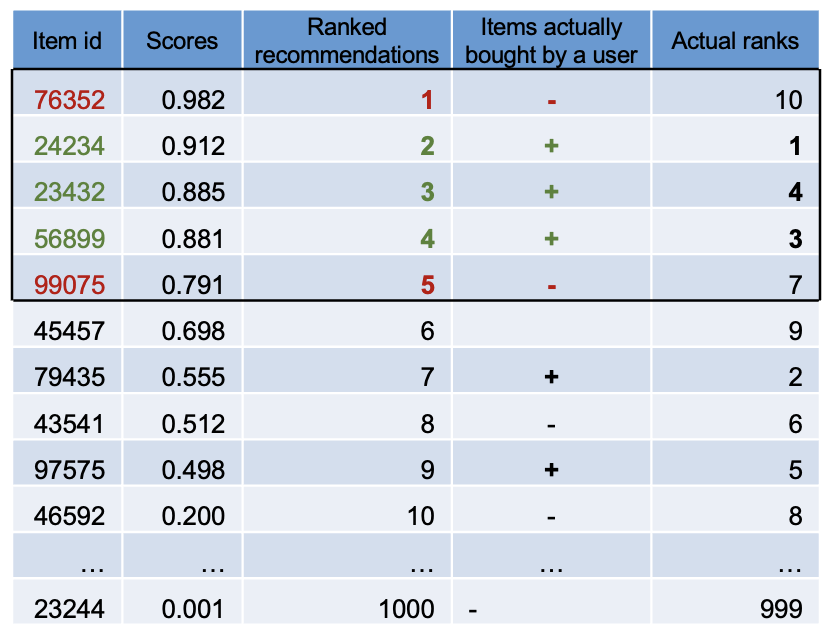
</div>

### Root mean squared error

<div>
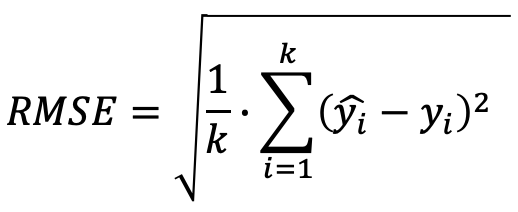
</div>

Evaluate deviations of predicted rating from actual rating.

In [ ]:
y_actual_bought = [0, 0, 1, 1, 0, 1, 0, 1]
y_recommended_bought  = [0, 1, 0, 0, 0, 1, 0, 1]

metrics.mean_squared_error(y_true=y_actual_bought, y_pred=y_recommended_bought, squared=False)

In [ ]:
y_actual_rating = [5, 4, 1, 1, 0, 3, 3, 3]
y_recommended_rating = [4, 5, 0, 0, 0, 2, 2, 1]

metrics.mean_squared_error(y_true=y_actual_rating, y_pred=y_recommended_rating, squared=False)

In [ ]:
## Probably the worst idea

y_actual_rank = [10, 1, 4, 3, 7]
y_recommended_rank = [1, 2, 3, 4, 5]

metrics.mean_squared_error(y_true=y_actual_rank, y_pred=y_recommended_rank, squared=False)

### Correlation coefficients

In [ ]:
from scipy.stats import spearmanr

y_actual_rank = [10, 1, 4, 3, 7]
y_recommended_rank = [1, 2, 3, 4, 5]

corr, _ = spearmanr(y_actual_rank, y_recommended_rank)
corr

**Actually, usually we are interested in top k recommendations only. And we care about rank positions of relevant items a lot**

### Mean average precision at k

<div>
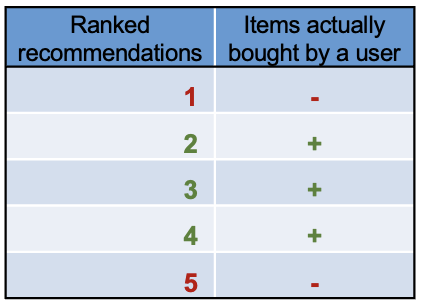
</div>

Precision@K is the fraction of relevant items in the top k recommended results.

**precision@k = TP / (TP + FN) = TP / k** <br>

Precision@k example:

    precision@1 = 0 / (0 + 1) = 0  
    precision@2 = 1 / (1 + 1) = 0.5  
    precision@3 = 2 / (2 + 1) = 0.67 
    precision@4 = 3 / (3 + 1) = 0.75  
    precision@5 = 3 / (3 + 2) = 0.6  
    
Average precision at k is the sum of precision@i for i=1,..,k divided by the total number of relevant items in the top k results.

<div>
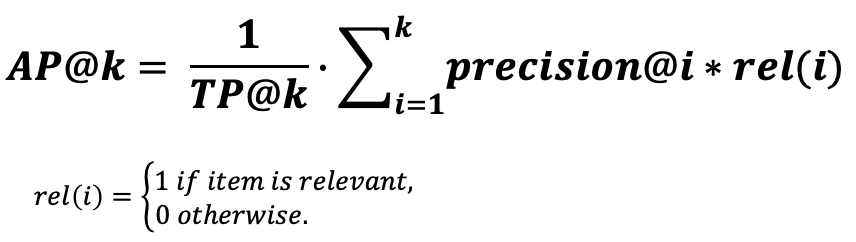
</div>

AP@k example:


    AP@5 = (1/3) * (0 * 0 + 0.5 * 1 + 0.67 * 1 + 0.75 * 1 + 0.6 * 0) = 0.64


**Mean average precision at k** is a mean for all users of averaged precision values calculated at ranks of relevant items found at first k positions. <br>

The MAP@k metric is one of the most commonly used metrics for evaluating recommender systems.


Recall also can be calculated in that fashion, but typically within RS we are not worrying about completeness.


In [ ]:
from implicit.evaluation import mean_average_precision_at_k

# mean_average_precision_at_k(model, train_user_items, test_user_items, K=5)


### Normalized Discounted Cumulative Gain at K

<div>
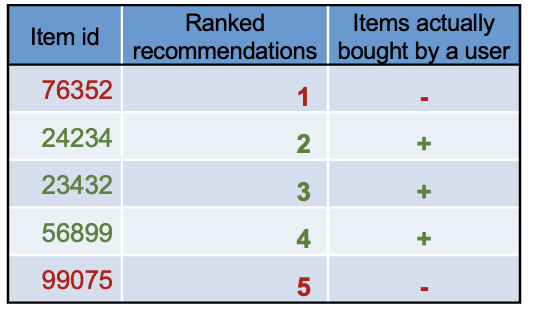
</div>

**Discounted Cumulative Gain** is another measure of ranking quality. It is also often used to measure effectiveness of web search engine algorithms or related applications. DCG measures the usefulness, or gain, of an item based on its position in the result list. The gain is accumulated from the top of the result list to the bottom, with the gain of each result discounted at lower ranks.



<div>
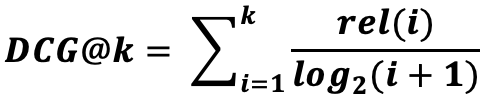
</div>

<div>
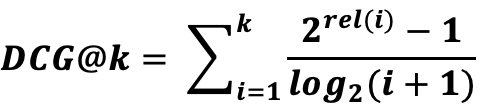
</div>



DCG for 5 positions example:
<div>
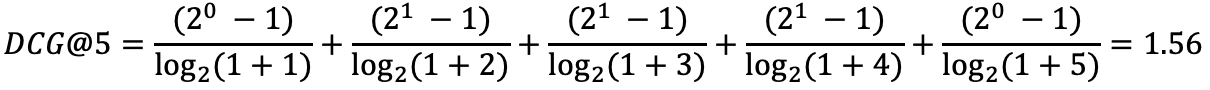
</div>
<br>


**Normalized Discounted Cumulative Gain** or **nDCG** is DCG normilized to the [0, 1] interval:**
<div>
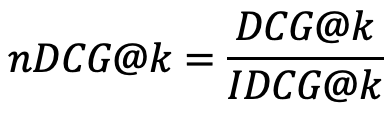
</div>

**IDCR** or **ideal discounted cumulative gain** is DCG calculated for the best ranking possible in this case.

<div>
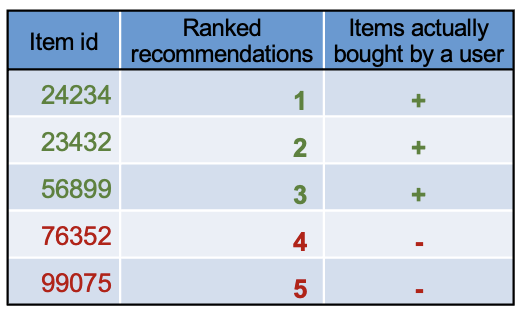
</div>

IDCG for 5 positions example:
<div>
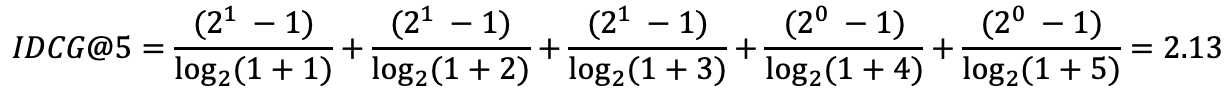
</div>
<br>

**nDCG**, finally:


<div>
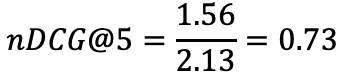
</div>



In [ ]:
from implicit.evaluation import ndcg_at_k

# ndcg_at_k(model, train_user_items, test_user_items, K=5)